<a href="https://colab.research.google.com/github/tien02/CS114.M11/blob/main/B%C3%A0i%20t%E1%BA%ADp%20th%E1%BB%B1c%20h%C3%A0nh%20s%E1%BB%91%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>B√ÅO C√ÅO B√ÄI T·∫¨P TH·ª∞C H√ÄNH S·ªê 1</b></center></h1>

<h2><center><b>B√†i to√°n d·ª± ƒëo√°n th·ªùi gian ch·∫°y c·ªßa thu·∫≠t to√°n (Run time prediction)</b></center></h2><br>

<table style="border:1px;">
  <tr style="border:1px;">
    <th>STT</th>
    <th>H·ªç v√† T√™n</th>
    <th>MSSV</th>
  </tr>
  <tr style="border:1px;">
    <td>1</td>
    <td>ƒê·∫∑ng Anh Ti·∫øn</td>
    <td>20520800</td>
  </tr>
  <tr style="border:1px;">
    <td>2</td>
    <td>ƒê√†o Minh Tu·∫•n</td>
    <td>20520842</td>
  </tr>
  <tr style="border:1px;">
    <td>3</td>
    <td>Nguy·ªÖn Th·ªã Hi·ªÅn Trang</td>
    <td>19522383</td>
  </tr>
</table>

# **Mount Drive**

In [1]:
# K·∫øt n·ªëi v·ªõi Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#  **Libraries & Functions**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
def Evaluation_Metrics(y, y_pred, text):
  print("==========Evaluate on {} Set==========".format(text))
  print("Mean Absolute Error: {}" .format(mean_absolute_error(y, y_pred)))
  print("Mean Squared Error: {}" .format(mean_squared_error(y, y_pred)))
  print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y,y_pred))))
  print("R2-score: {}".format(r2_score(y , y_pred) ))
  print('----------------------------------------------\n')

# **Data**

In [4]:
# ƒê·ªçc d·ªØ li·ªáu
data2 = pd.read_csv('/content/drive/MyDrive/CS114/DuÃõÃ£ ƒëoaÃÅn ThoÃõÃÄi Gian ChaÃ£y/DuÃõÃ£ ƒëoaÃÅn thoÃõÃÄi gian chaÃ£y Dataset/train.txt', names = ['Data Size', 'Runtime'])
data3 = pd.read_csv('/content/drive/MyDrive/CS114/DuÃõÃ£ ƒëoaÃÅn ThoÃõÃÄi Gian ChaÃ£y/DuÃõÃ£ ƒëoaÃÅn thoÃõÃÄi gian chaÃ£y Dataset/test.txt', names = ['Data Size', 'Runtime'])
data4 = pd.read_csv('/content/drive/MyDrive/CS114/DuÃõÃ£ ƒëoaÃÅn ThoÃõÃÄi Gian ChaÃ£y/DuÃõÃ£ ƒëoaÃÅn thoÃõÃÄi gian chaÃ£y Dataset/data4.txt', names = ['Data Size', 'Runtime'])

In [5]:
print("Shape of Data 2 Set: {}".format(data2.shape))
print("Shape of Data 3 Set: {}".format(data3.shape))
print("Shape of Data 4 Set: {}".format(data4.shape))

Shape of Data 2 Set: (71115, 2)
Shape of Data 3 Set: (10590, 2)
Shape of Data 4 Set: (6023, 2)


In [6]:
data2.head(5)

Data Size   Runtime
0    6083695  0.521842
1    1954367  0.152648
2    3734185  0.298548
3    5839301  0.460480
4    6343427  0.527977

In [7]:
data3.head(5)

Data Size  Runtime
0   37837612  4.12166
1   37395246  3.92089
2   36610827  3.21540
3   29555651  2.54506
4   25928216  2.21831

In [8]:
data4.head(5)

Data Size  Runtime
0   50142057  5.51836
1   65232531  7.18304
2   67683741  6.94395
3   59798449  5.48383
4   62297119  5.65503

In [9]:
data2.describe()

Data Size       Runtime
count  7.111500e+04  71115.000000
mean   4.998766e+06      0.406785
std    2.882618e+06      0.244039
min    2.550000e+02      0.000009
25%    2.496521e+06      0.192746
50%    5.010144e+06      0.403410
75%    7.481742e+06      0.616155
max    9.999882e+06      0.983776

In [10]:
data3.describe()

Data Size       Runtime
count  1.059000e+04  10590.000000
mean   2.999277e+07      2.642812
std    5.759381e+06      0.537305
min    2.000026e+07      1.669640
25%    2.503806e+07      2.180550
50%    2.994436e+07      2.639820
75%    3.500845e+07      3.100155
max    3.999734e+07      4.287660

In [11]:
data4.describe()

Data Size      Runtime
count  6.023000e+03  6023.000000
mean   6.001134e+07     5.510494
std    5.788140e+06     0.571520
min    5.000951e+07     4.395220
25%    5.501938e+07     5.019585
50%    5.992788e+07     5.495210
75%    6.506852e+07     6.002910
max    6.999990e+07     7.615200

‚ñ∂<b><u>Nh·∫≠n x√©t</u></b>:
<br>
Gi√° tr·ªã c·ªßa feature <b>Runtime</b> n·∫±m trong kho·∫£ng <b>[9e-6 , 0.98]</b> ƒë·ªëi v·ªõi <b>data2</b>, n·∫±m trong kho·∫£ng <b>[1.6 , 4.28]</b> ƒë·ªëi v·ªõi <b>data3</b> v√† n·∫±m trong kho·∫£ng <b>[4.3 , 7.6]</b> ƒë·ªëi v·ªõi <b>data4</b>. S·ª± ch√™nh l·ªách n√†y c√≥ th·ªÉ l√†m ·∫£nh h∆∞·ªüng ƒë·∫øn performance c·ªßa model, model c√≥ kh·∫£ nƒÉng b·ªã <b>overfiting</b>.




In [12]:
data2_X = data2['Data Size']
data2_y = data2['Runtime']
data3_X = data3['Data Size']
data3_y = data3['Runtime']
data4_X = data4['Data Size']
data4_y = data4['Runtime']

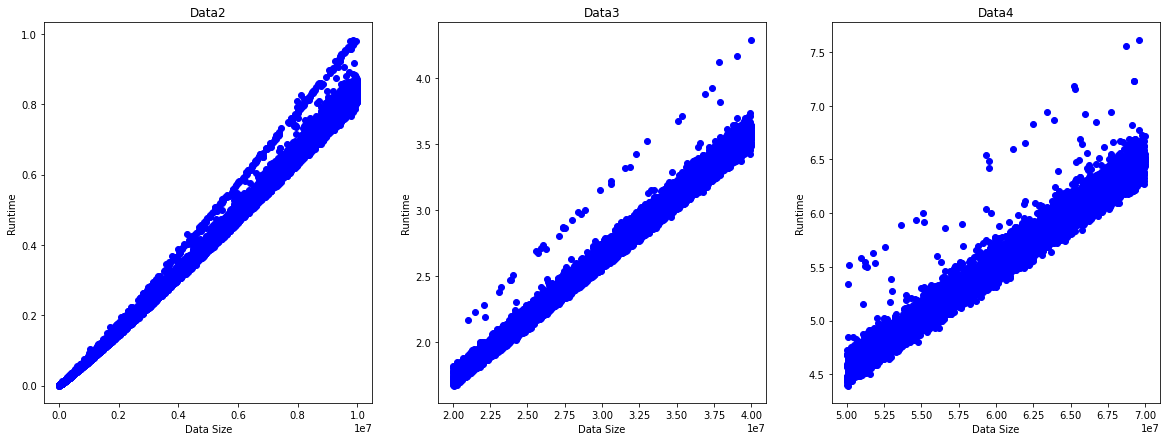

In [13]:
plt.figure(figsize=(20, 7))

plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y, color='blue')
plt.ylabel('Runtime')
plt.xlabel('Data Size')

plt.show()

‚ñ∂<b>Nh·∫≠n x√©t</b>:<br>
Theo <b>scatter plot</b> tr√™n, d·ªØ li·ªáu c√≥ h√¨nh d·∫°ng nh∆∞ m·ªôt 'c√°i ch√†y', m·ªôt <b>linear model</b> c√≥ v·∫ª ph√π h·ª£p cho b√†i to√°n. Tuy nhi√™n ƒë·ªëi v·ªõi Data3 v√† ƒë·∫∑c bi·ªát l√† Data4, d·ªØ li·ªáu <b>noise</b> r·∫•t nhi·ªÅu.

In [14]:
X_data2 = np.asanyarray(data2[['Data Size']])
y_data2 = np.asanyarray(data2[['Runtime']])

X_data3 = np.asanyarray(data3[['Data Size']])
y_data3 = np.asanyarray(data3[['Runtime']])

X_data4 = np.asanyarray(data4[['Data Size']])
y_data4 = np.asanyarray(data4[['Runtime']])

In [15]:
print("X in Data2 shape: {}".format(X_data2.shape))
print("y in Data2 shape: {}".format(y_data2.shape))

print('\n')

print("X in Data3 shape: {}".format(X_data3.shape))
print("y in Data3 shape: {}".format(y_data3.shape))

print('\n')

print("X in Data4 shape: {}".format(X_data4.shape))
print("y in Data4 shape: {}".format(y_data4.shape))

X in Data2 shape: (71115, 1)
y in Data2 shape: (71115, 1)


X in Data3 shape: (10590, 1)
y in Data3 shape: (10590, 1)


X in Data4 shape: (6023, 1)
y in Data4 shape: (6023, 1)


# <b><u>Linear Regression with One Variable</u></b>

## **Linear Regression** (linear_model)

### **Model**

In [16]:
# Train Model v·ªõi Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_data2,y_data2)
print("Linear Regression Model Intercept: {}".format(linear_model.intercept_))
print("Linear Regression Model Coefficents: {}".format(linear_model.coef_))

Linear Regression Model Intercept: [-0.01589553]
Linear Regression Model Coefficents: [[8.45569856e-08]]


### **Evaluate**

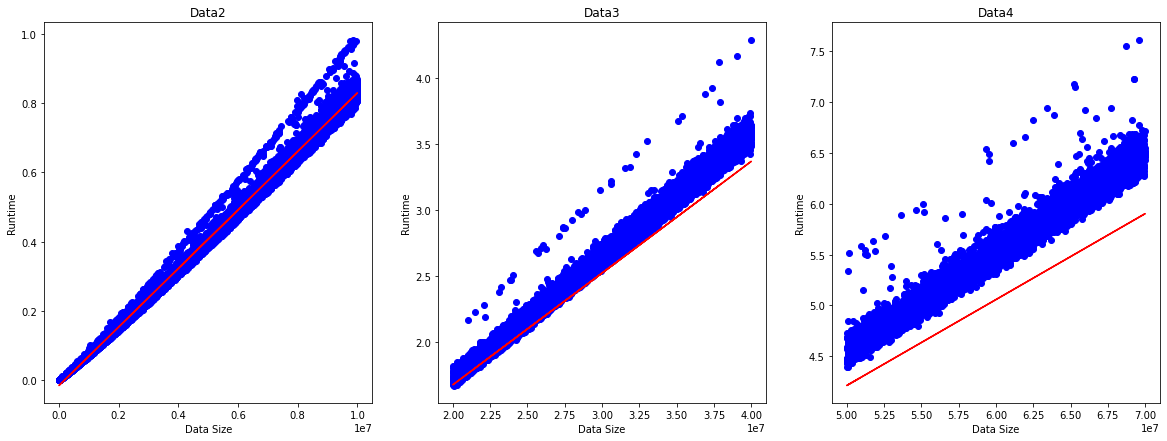

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, linear_model.coef_[0][0]*X_data2 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, linear_model.coef_[0][0]*X_data3 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, linear_model.coef_[0][0]*X_data4 + linear_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [18]:
y_data2_linear_pred = linear_model.predict(X_data2)
y_data3_linear_pred = linear_model.predict(X_data3)
y_data4_linear_pred = linear_model.predict(X_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_linear_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_linear_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_linear_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.008291970317762349
Mean Squared Error: 0.00014337728721748835
Root Mean Squared Error: 0.011974025522667318
R2-score: 0.9975924993345858
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.12271198006925235
Mean Squared Error: 0.020664949397549082
Root Mean Squared Error: 0.14375308482794058
R2-score: 0.9284132208349453
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.4520113867328918
Mean Squared Error: 0.22348476817426036
Root Mean Squared Error: 0.4727417563260732
R2-score: 0.3156839605365861
----------------------------------------------





‚ñ∂<b><u>Nh·∫≠n x√©t</u></b>: <br>
<li><b>MAE</b>, <b>MSE</b>, <b>RMSE</b> c·ªßa c√°c predicted label tr√™n <b>Data2 Set</b>(Training Set) nh·ªè h∆°n r·∫•t nhi·ªÅu so v·ªõi <b>Data3 Set</b> v√† <b>Data4 Set</b></li>
<li><b>R2-score</b> cho th·∫•y <b>linear_model</b> ƒë∆∞a ra c√°c d·ª± ƒëo√°n r·∫•t t·ªët ƒë·ªëi v·ªõi c√°c d·ªØ li·ªáu trong Training Set (<b>Data2~0.99</b>). Nh∆∞ng l·∫°i th·ª±c hi·ªán kh√¥ng t·ªët b·∫±ng so v·ªõi c√°c d·ªØ li·ªáu trong Test Set (<b>Data3~0.92</b>) v√† th·∫≠m ch√≠ r·∫•t t·ªá ƒë·ªëi v·ªõi (<b>Data4~0.31</b>)  </li>
<li>ƒêi·ªÅu ƒë√≥ c√≥ nghƒ©a l√† <b>linear_model</b> ch·ªâ th·ª±c hi·ªán d·ª± ƒëo√°n t·ªët ƒë·ªëi v·ªõi c√°c d·ªØ li·ªáu ƒë∆∞·ª£c nh√¨n th·∫•y tr∆∞·ªõc (<b>Data2</b>), ƒë·ªëi v·ªõi c√°c d·ªØ li·ªáu m·ªõi (<b>Data3</b>, <b>Data4</b>) th√¨ Model l·∫°i d·ª± ƒëo√°n kh√¥ng ƒë∆∞·ª£c t·ªët b·∫±ng.</li>
‚ñ∂‚ñ∂<b> linear_model b·ªã overfitting</b>.<br>

## **Delete some training samples** (linear_model_del_some_sample)
Nguy√™n nh√¢n <b>Linear Regression Model</b> b·ªã overfitting c√≥ th·ªÉ l√† v√¨ d·ªØ li·ªáu tr√™n Training Set (**Data2**) c√≥ scale c·ªßa label **th·∫•p h∆°n ƒë√°ng k·ªÉ** so v·ªõi Test Set (**Data3**, **Data4**). ƒêi·ªÅu ƒë√≥ ·∫£nh h∆∞·ªüng kh√¥ng t·ªët ƒë·∫øn performance c·ªßa Model.<br>
‚ñ∂<b><u>Gi·∫£i ph√°p:</b></u> Lo·∫°i b·ªè c√°c training sample c√≥ label qu√° th·∫•p.<br>
> D·ª±a tr√™n mi·ªÅn gi√° tr·ªã c·ªßa Training Label l·∫ßn l∆∞·ª£t ƒë·∫∑t c√°c threshold c√≥ gi√° tr·ªã <b>0.4</b>; <b>0.5</b>; <b>0.6</b>; <b>0.7</b>; <b>0.8</b>; <b>0.9</b>. Train Model v·ªõi c√°c sample c√≥ gi√° tr·ªã label l·ªõn h∆°n l·∫ßn l∆∞·ª£t c√°c threshold. V√¨ mi·ªÅn gi√° tr·ªã c·ªßa label **Runtime** n·∫±m trong kho·∫£ng **[9e-6 , 0.98]** n√™n ƒë·∫∑t threshold c√≥ gi√° tr·ªã nh∆∞ tr√™n ƒë·ªÉ lo·∫°i b·ªè b·ªõt c√°c sample c√≥ gi√° tr·ªã th·∫•p.




In [19]:
threshold_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

======================Threshold: 0.4=======================
X_train shape: (35852, 1)
y_train shape: (35852, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.011029848728470905
Mean Squared Error: 0.00021425019283903449
Root Mean Squared Error: 0.014637287755558899
R2-score: 0.9964024463578902
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.07384965940218395
Mean Squared Error: 0.009513783536104197
Root Mean Squared Error: 0.09753862586741828
R2-score: 0.9670426910842569
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.3308178299640628
Mean Squared Error: 0.12694251692576344
Root Mean Squared Error: 0.35628993379797225
R2-score: 0.6112987872425355
----------------------------------------------



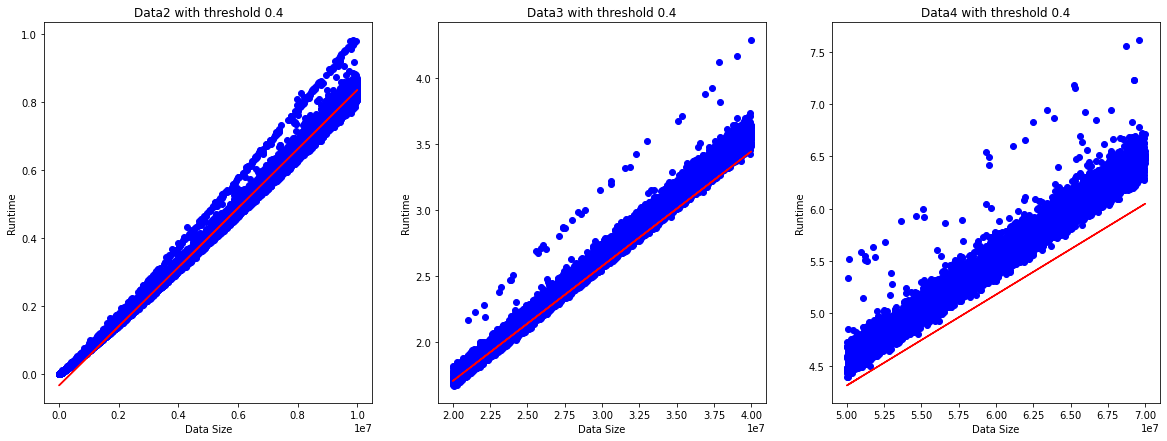




======================Threshold: 0.5=======================
X_train shape: (27405, 1)
y_train shape: (27405, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.011128217239027884
Mean Squared Error: 0.00021738068368045335
Root Mean Squared Error: 0.014743835446736828
R2-score: 0.9963498811369264
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.07260743046053066
Mean Squared Error: 0.009275871836406673
Root Mean Squared Error: 0.09631132766402233
R2-score: 0.9678668562916999
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.32737239150818664
Mean Squared Error: 0.12463349204356398
Root Mean Squared Error: 0.35303468957535034
R2-score: 0.618369080109999
----------------------------------------------



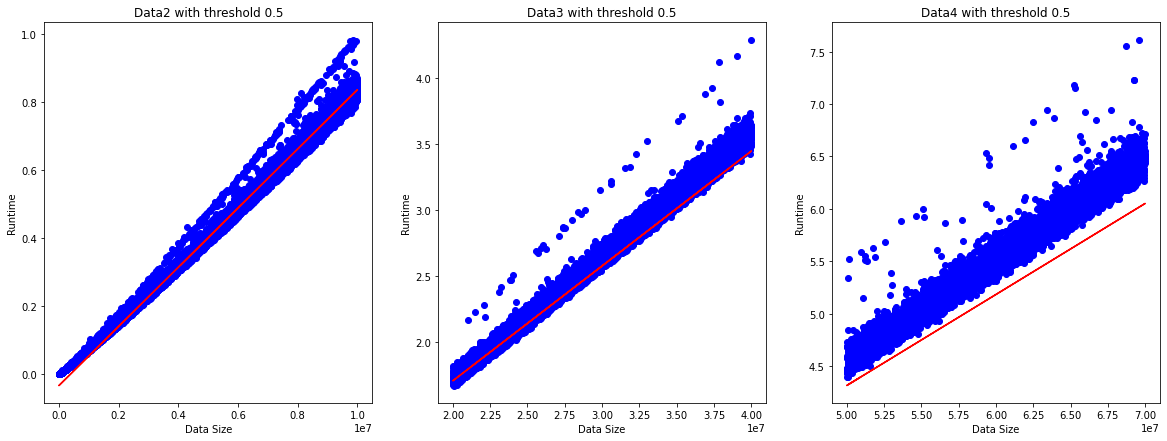




======================Threshold: 0.6=======================
X_train shape: (19088, 1)
y_train shape: (19088, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.009302029365561564
Mean Squared Error: 0.00016169562704552006
Root Mean Squared Error: 0.012715959540888767
R2-score: 0.9972849093656225
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.08941105057870871
Mean Squared Error: 0.012679969990312633
Root Mean Squared Error: 0.11260537283057427
R2-score: 0.9560745011249004
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.3745827160316139
Mean Squared Error: 0.15840364250298228
Root Mean Squared Error: 0.3979995508828902
R2-score: 0.51496402121823
----------------------------------------------



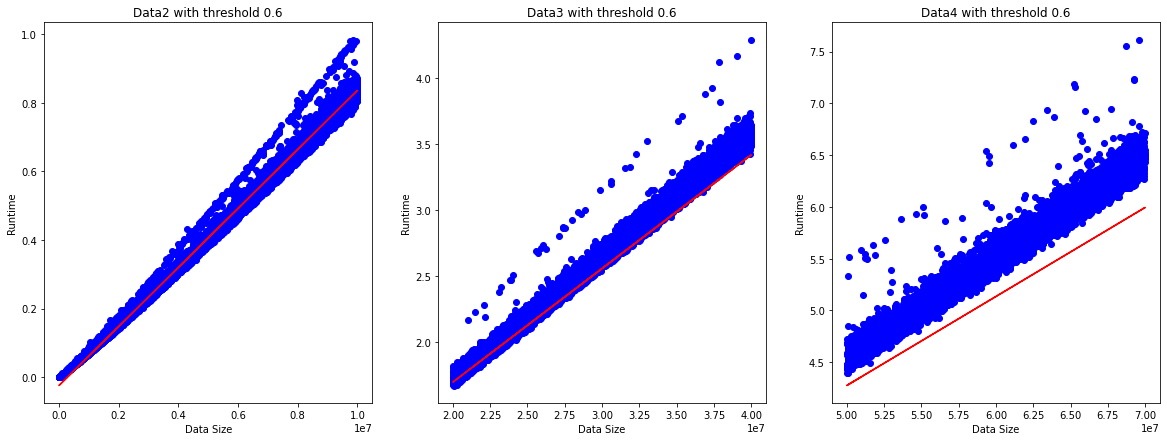




======================Threshold: 0.7=======================
X_train shape: (11052, 1)
y_train shape: (11052, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.024756926731401566
Mean Squared Error: 0.0007515725266979092
Root Mean Squared Error: 0.027414823119945697
R2-score: 0.9873800697917549
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.19211214661601386
Mean Squared Error: 0.04497934729986052
Root Mean Squared Error: 0.21208334988834113
R2-score: 0.8441841525861512
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.6317424649349715
Mean Squared Error: 0.42166979607584104
Root Mean Squared Error: 0.649361067570147
R2-score: -0.29116363128142253
----------------------------------------------



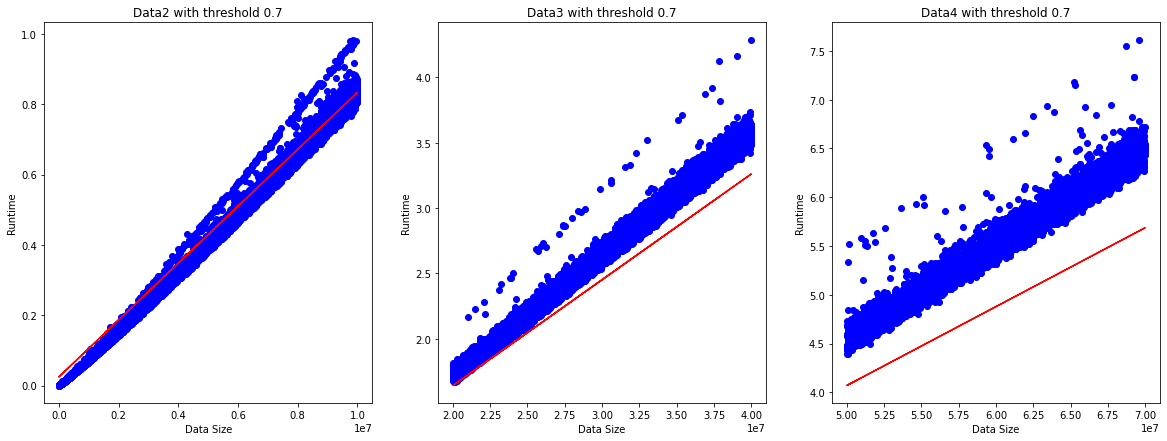




======================Threshold: 0.8=======================
X_train shape: (2902, 1)
y_train shape: (2902, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.32140453305347644
Mean Squared Error: 0.13748684893601384
Root Mean Squared Error: 0.37079219103968986
R2-score: -1.308592153770201
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 1.4096589684118384
Mean Squared Error: 2.1649547485788196
Root Mean Squared Error: 1.4713785198169842
R2-score: -6.499758867410038
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 3.67021598388189
Mean Squared Error: 13.679954407932303
Root Mean Squared Error: 3.698642238434572
R2-score: -40.88836803936823
----------------------------------------------



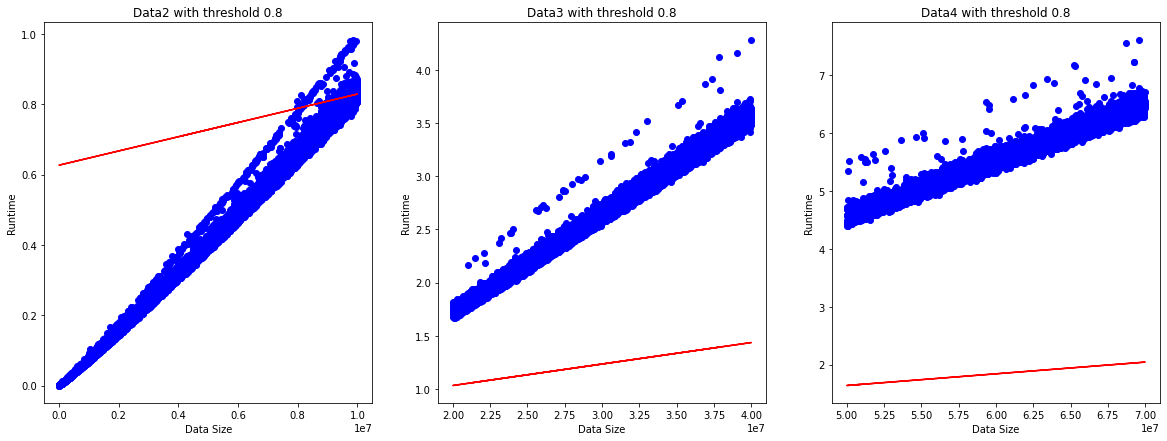




======================Threshold: 0.9=======================
X_train shape: (30, 1)
y_train shape: (30, 1)
==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.12231894643839956
Mean Squared Error: 0.01539078313405173
Root Mean Squared Error: 0.12405959509063268
R2-score: 0.7415677102310589
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.14920560731817775
Mean Squared Error: 0.02504867627485149
Root Mean Squared Error: 0.15826773605145014
R2-score: 0.9132272708551896
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.08616841415445993
Mean Squared Error: 0.015652759331423422
Root Mean Squared Error: 0.12511098805230267
R2-score: 0.9520708531509336
----------------------------------------------



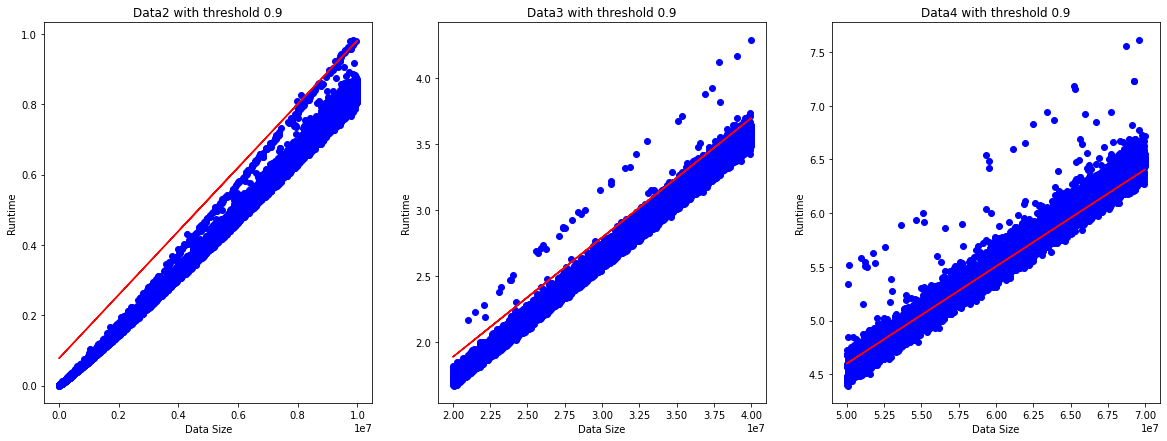

In [20]:
for threshold in threshold_list:
  print("======================Threshold: {}=======================".format(threshold))
  new_data2 = data2[data2["Runtime"] >= threshold]

  new_X_data2 = np.asanyarray(new_data2[['Data Size']])
  new_y_data2 = np.asanyarray(new_data2[['Runtime']])

  print("X_train shape: {}".format(new_X_data2.shape))
  print("y_train shape: {}".format(new_y_data2.shape))

  linear_model_del_some_sample = LinearRegression()
  linear_model_del_some_sample.fit(new_X_data2, new_y_data2)

  new_y_data2_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data2)
  new_y_data3_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data3)
  new_y_data4_linear_del_some_sample_pred = linear_model_del_some_sample.predict(X_data4)

  #Data2 evaluate
  Evaluation_Metrics(y_data2, new_y_data2_linear_del_some_sample_pred, "Data2")
  #Data3 evaluate
  Evaluation_Metrics(y_data3, new_y_data3_linear_del_some_sample_pred, "Data3")
  #Data4 evaluate
  Evaluation_Metrics(y_data4, new_y_data4_linear_del_some_sample_pred, "Data4")

  plt.figure(figsize=(20,7))
  plt.subplot(1,3,1)
  plt.title("Data2 with threshold {}".format(threshold))
  plt.scatter(data2_X, data2_y,  color='blue')
  plt.plot(X_data2, linear_model_del_some_sample.coef_[0][0]*X_data2 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.subplot(1,3,2)
  plt.title("Data3 with threshold {}".format(threshold))
  plt.scatter(data3_X, data3_y,  color='blue')
  plt.plot(X_data3, linear_model_del_some_sample.coef_[0][0]*X_data3 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.subplot(1,3,3)
  plt.title("Data4 with threshold {}".format(threshold))
  plt.scatter(data4_X, data4_y,  color='blue')
  plt.plot(X_data4, linear_model_del_some_sample.coef_[0][0]*X_data4 + linear_model_del_some_sample.intercept_[0], '-r')
  plt.xlabel("Data Size")
  plt.ylabel("Runtime")

  plt.show()
  print("\n\n")


‚ñ∂<b><u>Nh·∫≠n x√©t</u></b>: <br>
<li>Vi·ªác lo·∫°i b·ªè c√°c samples c√≥ gi√° tr·ªã b√© h∆°n threshold ·∫£nh h∆∞·ªüng ƒë·∫øn performance c·ªßa Linear Regression Model (<b>linear_model_del_some_sample</b>).</li>
<li>ƒê·ªëi v·ªõi Model <b>linear_model_del_some_sample</b> ƒë∆∞·ª£c train v·ªõi sample c√≥ feature l·ªõn h∆°n threshold <b>0.4</b>, performance ƒë∆∞·ª£c c·∫£i thi·ªán t·ªët h∆°n, ƒëi·ªÅu ƒë√≥ ƒë∆∞·ª£c th·ªÉ hi·ªán th√¥ng qua R2-score ƒë·∫°t <b>Data2~0.99</b>, <b>Data3~0.96</b> v√† <b>Data4~0.61</b>. ƒêi·ªÅu ƒë√≥ cho th·∫•y <b>linear_model_del_some_sample ƒë∆∞·ª£c train v·ªõi label sample l·ªõn h∆°n 0.4 </b> th·ª±c hi·ªán d·ª± ƒëo√°n t·ªët ƒë·ªëi v·ªõi c√°c sample c√≥ scale th·∫•p (Data2, Data3) nh∆∞ng l·∫°i kh√¥ng t·ªët l·∫Øm ƒë·ªëi v·ªõi c√°c sample c√≥ scale cao (Data4).</li>
<li>V·ªõi Model <b>linear_model_del_some_sample</b> ƒë∆∞·ª£c train v·ªõi sample c√≥ feature l∆°n h∆°n threshold <b>0.9</b>, tuy Model kh√¥ng th·ªÉ hi·ªán t·ªët ƒë·ªëi v·ªõi Training Set(<b>R2-score Data2~0.74</b>) nh∆∞ng l·∫°i th·ªÉ hi·ªán t·ªët ƒë·ªëi v·ªõi Data3 v√† Data4 khi <b>R2-score</b> l·∫ßn l∆∞·ª£t ƒë·∫°t <b>~0.91</b> v√† <b>~0.95</b>. ƒêi·ªÅu ƒë√≥ cho th·∫•y Model ƒë∆∞·ª£c c·∫£i thi·ªán th√¥ng qua vi·ªác d·ª± ƒëo√°n t·ªët ƒë·ªëi v·ªõi c√°c feature c√≥ scale l·ªõn h∆°n, t·ª©c l√† d·ª± ƒëo√°n t·ªët ƒë·ªëi v·ªõi c√°c sample ch∆∞a ƒë∆∞·ª£c nh√¨n th·∫•y tr∆∞·ªõc. Model ƒë√£ kh√¥ng c√≤n overfiting. Nh∆∞ng l·∫°i th·ª±c hi·ªán d·ª± ƒëo√°n kh√¥ng t·ªët ƒë·ªëi v·ªõi c√°c sample c√≥ scale th·∫•p (Data2).</li>
<li>So v·ªõi Model <b>linear_model</b>, tuy performance c·ªßa <b>linear_model_del_some_sample</b> t·ªët h∆°n th√¥ng qua vi·ªác train model v·ªõi c√°c sample c√≥ gi√° tr·ªã l∆°n h∆°n threshold, nh∆∞ng v·∫´n ch∆∞a th·ª±c s·ª± ƒë·ªß t·ªët(general) ƒë·ªÉ c√≥ th·ªÉ d·ª± ƒëo√°n t·ªët m·ªçi tr∆∞·ªùng h·ª£p.</li>

# **<u>Linear Regression  with Multiple Variable </u>**
Train Linear Regression Model v·ªõi multiple variable ƒë·ªÉ ƒë√°nh gi√° performance c·ªßa Model c√≥ ƒë∆∞·ª£c c·∫£i thi·ªán hay kh√¥ng.

## **Polynomial** (poly_model)
Thay v√¨ Linear Model, th·ª≠ nghi·ªám v·ªõi Quadratic Model c√≥ gi√∫p c·∫£i thi·ªán performance hay kh√¥ng.

### **Data**

In [21]:
poly_quadratic = PolynomialFeatures(degree = 2)
X_poly_quadratic_data2 = poly_quadratic.fit_transform(X_data2)
X_poly_quadratic_data3 = poly_quadratic.fit_transform(X_data3)
X_poly_quadratic_data4 = poly_quadratic.fit_transform(X_data4)

print("X_data2 shape: {}".format(X_poly_quadratic_data2.shape))
print("X_data3 shape: {}".format(X_poly_quadratic_data3.shape))
print("X_data4 shape: {}".format(X_poly_quadratic_data4.shape))

X_data2 shape: (71115, 3)
X_data3 shape: (10590, 3)
X_data4 shape: (6023, 3)


### **Model**

In [22]:
# Train Model v·ªõi H√†m b·∫≠c 2
poly_model = LinearRegression()
poly_model.fit(X_poly_quadratic_data2, y_data2)
print("Coefficents: {}".format(poly_model.coef_))
print("Intercept: {}".format(poly_model.intercept_))

Coefficents: [[0.00000000e+00 7.85415401e-08 6.02207246e-16]]
Intercept: [-0.00587744]


### **Evaluate**

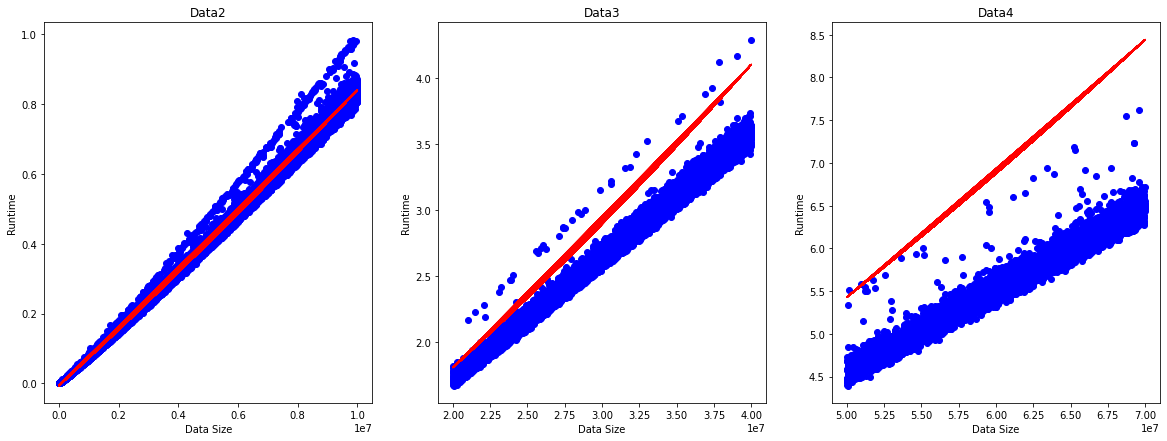

In [23]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2,  poly_model.coef_[0][1]*X_data2 + poly_model.coef_[0][2]*np.power(X_data2,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, poly_model.coef_[0][1]*X_data3 + poly_model.coef_[0][2]*np.power(X_data3,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4,  poly_model.coef_[0][1]*X_data4 + poly_model.coef_[0][2]*np.power(X_data4,2) + poly_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [24]:
y_data2_poly_pred = poly_model.predict(X_poly_quadratic_data2)
y_data3_poly_pred = poly_model.predict(X_poly_quadratic_data3)
y_data4_poly_pred = poly_model.predict(X_poly_quadratic_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_poly_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_poly_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_poly_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.007073665718015936
Mean Squared Error: 0.00012327598540427578
Root Mean Squared Error: 0.011102971917656811
R2-score: 0.9979300276727918
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.2703565635200137
Mean Squared Error: 0.09177695238564393
Root Mean Squared Error: 0.30294711153210213
R2-score: 0.6820695615324346
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 1.3859805816162731
Mean Squared Error: 2.034187428861318
Root Mean Squared Error: 1.426249427295702
R2-score: -5.228733601026541
----------------------------------------------





‚ñ∂<b><u>Nh·∫≠n x√©t</u></b>:<br>
D·ª±a v√†o k·∫øt qu·∫£ R2-score, MAE, MSE, RMSE c√≥ th·ªÉ th·∫•y <b>poly_model</b> cho k·∫øt qu·∫£ r·∫•t x·∫•u v√† overfitting n·∫∑ng h∆°n tr∆∞·ªõc r·∫•t nhi·ªÅu (R2-score ƒë·∫°t **~0.99 tr√™n Train Set(Data2)** nh∆∞ng l·∫°i ƒë∆∞·ª£c l·∫ßn l∆∞·ª£t **~0.68, ~-5.2 tr√™n Data3 v√† Data4**. <br>
‚ñ∂‚ñ∂ <b>Polynomial Regression kh√¥ng ph√π h·ª£p v·ªõi b√†i to√°n.</b>

## **G·ª£i √Ω c·ªßa Th·∫ßy An** (multi_val_model)
B√†i to√°n d·ª± ƒëo√°n th·ªùi gian ch·∫°y c√≥ input l√† k√≠ch th∆∞·ªõc d·ªØ li·ªáu. ƒê·ªô ph·ª©c t·∫°p thu·∫≠t to√°n c√≥ th·ªÉ hi·ªÉu l√† n√≥ t·ªâ l·ªá thu·∫≠n (1 c√°ch t∆∞∆°ng ƒë·ªëi) v·ªõi th·ªùi gian ch·∫°y.<br>
‚ñ∂ X√¢y d·ª±ng Model c√≥ hypothesis d·ª±a tr√™n ƒë·ªô ph·ª©c t·∫°p thu·∫≠t to√°n: <br>
> y = ùû±_1*sqrt(x) + ùû±_2*log(x)+ùû±_3 * x + ùû±_4 *x *log(x) + ùû±_5 * x^2 + ùû±_6 * x^3 + ùû±_0

### **Data**

In [25]:
sqrt_X_data2 = np.sqrt(X_data2)
sqrt_X_data3 = np.sqrt(X_data3)
sqrt_X_data4 = np.sqrt(X_data4)

log_X_data2 = np.log(X_data2)
log_X_data3 = np.log(X_data3)
log_X_data4 = np.log(X_data4)

X_quad_data2 = np.power(X_data2, 2)
X_quad_data3 = np.power(X_data3, 2)
X_quad_data4 = np.power(X_data4, 2)

X_cubic_data2 = np.power(X_data2,3)
X_cubic_data3 = np.power(X_data3,3)
X_cubic_data4 = np.power(X_data4,3)

one_data2 = np.ones((X_data2.shape[0], 1))
one_data3 = np.ones((X_data3.shape[0], 1))
one_data4 = np.ones((X_data4.shape[0], 1))

In [26]:
new_X_data2 = np.concatenate((one_data2, sqrt_X_data2, log_X_data2, X_data2, X_data2 * log_X_data2, X_quad_data2, X_cubic_data2), axis = 1)
new_X_data3 = np.concatenate((one_data3, sqrt_X_data3, log_X_data3, X_data3, X_data3 * log_X_data3, X_quad_data3, X_cubic_data3), axis = 1)
new_X_data4 = np.concatenate((one_data4, sqrt_X_data4, log_X_data4, X_data4, X_data4 * log_X_data4, X_quad_data4, X_cubic_data4), axis = 1)

In [27]:
print("New X_data2 shape: {}".format(new_X_data2.shape))
print("New X_data3 shape: {}".format(new_X_data3.shape))
print("New X_data4 shape: {}".format(new_X_data4.shape))

New X_data2 shape: (71115, 7)
New X_data3 shape: (10590, 7)
New X_data4 shape: (6023, 7)


### **Model**

In [28]:
multi_val_model = LinearRegression()
multi_val_model.fit(new_X_data2, y_data2)
print("Coefficents: {}".format(multi_val_model.coef_))
print("Intercept: {}".format(multi_val_model.intercept_))

Coefficents: [[ 0.00000000e+00  2.38580182e-11  1.00246977e-13  5.62062028e-09
   4.85026693e-09 -4.44652097e-18 -1.35967813e-23]]
Intercept: [0.00018728]


### **Evaluate**

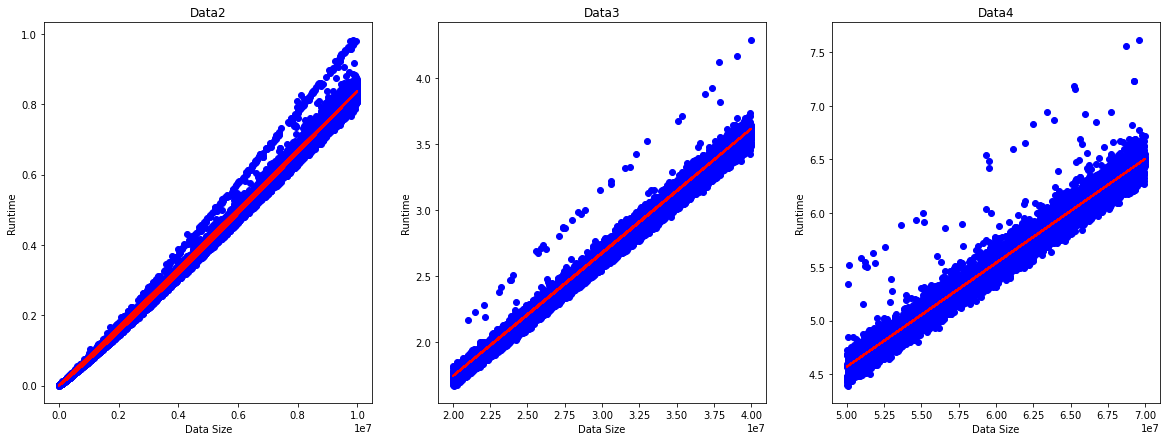

In [29]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, multi_val_model.coef_[0][1]*np.sqrt(X_data2) +
                  multi_val_model.coef_[0][2]*np.log(X_data2) + 
                  multi_val_model.coef_[0][3]*X_data2 + 
                  multi_val_model.coef_[0][4]* X_data2 * np.log(X_data2) + 
                  multi_val_model.coef_[0][5]*np.power(X_data2,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data2,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, multi_val_model.coef_[0][1]*np.sqrt(X_data3) +
                  multi_val_model.coef_[0][2]*np.log(X_data3) + 
                  multi_val_model.coef_[0][3]*X_data3 + 
                  multi_val_model.coef_[0][4]* X_data3 * np.log(X_data3) + 
                  multi_val_model.coef_[0][5]*np.power(X_data3,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data3,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, multi_val_model.coef_[0][1]*np.sqrt(X_data4) +
                  multi_val_model.coef_[0][2]*np.log(X_data4) + 
                  multi_val_model.coef_[0][3]*X_data4 + 
                  multi_val_model.coef_[0][4]* X_data4 * np.log(X_data4) + 
                  multi_val_model.coef_[0][5]*np.power(X_data4,2) +
                  multi_val_model.coef_[0][6]*np.power(X_data4,3) +
                  multi_val_model.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [30]:
y_data2_multi_pred = multi_val_model.predict(new_X_data2)
y_data3_multi_pred = multi_val_model.predict(new_X_data3)
y_data4_multi_pred = multi_val_model.predict(new_X_data4)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_multi_pred, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_multi_pred, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_multi_pred, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.006871473074348903
Mean Squared Error: 0.00012189765354938603
Root Mean Squared Error: 0.011040727038985523
R2-score: 0.9979531717489716
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.05064786117398697
Mean Squared Error: 0.004274709679988428
Root Mean Squared Error: 0.06538126398279884
R2-score: 0.9851917034990492
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.08833723190556117
Mean Squared Error: 0.014989327339488103
Root Mean Squared Error: 0.12243090843201361
R2-score: 0.9541022987697263
----------------------------------------------





‚ñ∂<b><u>Nh·∫≠n x√©t</u></b>:<br>
So v·ªõi c√°c gi·∫£i ph√°p tr√™n th√¨ performance c·ªßa <b>multi_val_model</b> ƒë∆∞·ª£c c·∫£i thi·ªán ƒë√°ng k·ªÉ. R2-score ƒë·ªëi v·ªõi **Data2** (Train Set) v·∫´n 0.99 v√† ƒë·ªëi v·ªõi **Data2, Data3**(Test Set) ƒë√£ ƒë∆∞·ª£c c·∫£i thi·ªán ƒë√°ng k·ªÉ l·∫ßn l∆∞·ª£t l√† **~98** v√† **~95**. Tuy c√≤n overfiting m·ªôt ch√∫t nh∆∞ng kh√¥ng ƒë√°ng k·ªÉ. ƒê√¢y l√† k·∫øt qu·∫£ c√≥ th·ªÉ ch·∫•p nh·∫≠n ƒë∆∞·ª£c, cho th·∫•y <b>multi_val_model</b> c√≥ th·ªÉ ƒë∆∞a ra c√°c d·ª± ƒëo√°n t·ªët ƒë∆∞·ª£c c√°c tr∆∞·ªùng h·ª£p sample c√≥ scale l·ªõn v√† nh·ªè.

# **<u>Model c·ªßa Nh√≥m</u>** (muti_val_model_2)
D·ª±a v√†o g·ª£i √Ω c·ªßa th·∫ßy, nh√≥m ch√∫ng em ti·∫øn h√†nh th·ª±c nghi·ªám  v·ªõi nhi·ªÅu hypothesis kh√°c nhau v√† cho ra k·∫øt qu·∫£ t∆∞∆°ng ƒë·ªëi t·ªët ƒë·ªëi v·ªõi hypothesis sau:
> y = ùöπ_0 + ùöπ_1 * log2(x) + ùöπ_2 * X^2 + ùöπ_3 * x * log2(x)

## **Data**

In [31]:
log_2_X_data2 = np.log2(X_data2) 
log_2_X_data3 = np.log2(X_data3)
log_2_X_data4 = np.log2(X_data4)

In [32]:
new_X_data2_2 = np.concatenate((one_data2, log_2_X_data2, X_quad_data2, X_data2 * log_2_X_data2), axis = 1)
new_X_data3_2 = np.concatenate((one_data3, log_2_X_data3, X_quad_data3, X_data3 * log_2_X_data3), axis = 1)
new_X_data4_2 = np.concatenate((one_data4, log_2_X_data4, X_quad_data4, X_data4 * log_2_X_data4), axis = 1)

In [33]:
print("New X_data2 shape: {}".format(new_X_data2_2.shape))
print("New X_data3 shape: {}".format(new_X_data3_2.shape))
print("New X_data4 shape: {}".format(new_X_data4_2.shape))

New X_data2 shape: (71115, 4)
New X_data3 shape: (10590, 4)
New X_data4 shape: (6023, 4)


## **Model**

In [34]:
multi_val_model_2 = LinearRegression()
multi_val_model_2.fit(new_X_data2_2, y_data2)
print("Coefficents: {}".format(multi_val_model_2.coef_))
print("Intercept: {}".format(multi_val_model_2.intercept_))

Coefficents: [[ 0.00000000e+00  1.55061620e-04 -3.88686479e-17  3.61305901e-09]]
Intercept: [-0.00223771]


## **Evaluate**

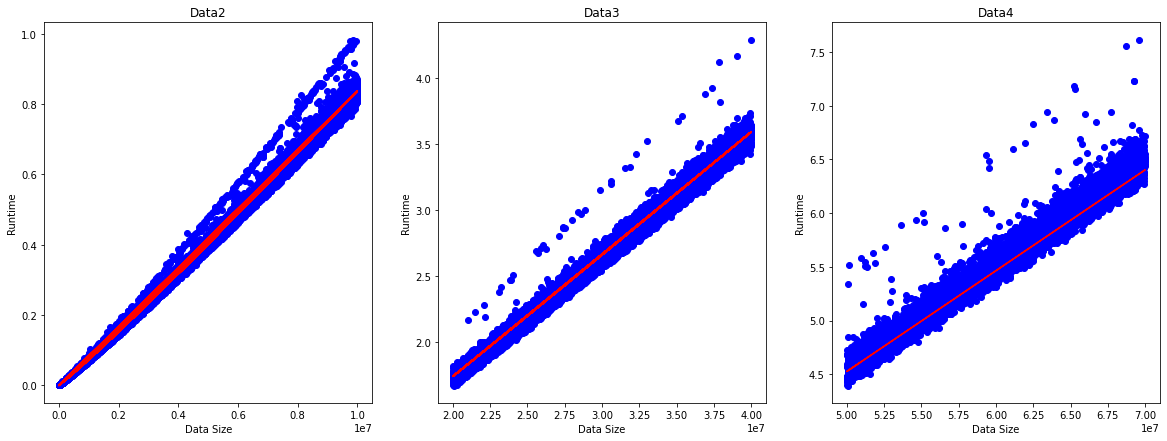

In [35]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Data2")
plt.scatter(data2_X, data2_y,  color='blue')
plt.plot(X_data2, multi_val_model_2.coef_[0][1]*np.log2(X_data2) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data2,2) + 
                  multi_val_model_2.coef_[0][3]* X_data2 * np.log2(X_data2) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,2)
plt.title("Data3")
plt.scatter(data3_X, data3_y,  color='blue')
plt.plot(X_data3, multi_val_model_2.coef_[0][1]*np.log2(X_data3) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data3,2) + 
                  multi_val_model_2.coef_[0][3]* X_data3 * np.log2(X_data3) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.subplot(1,3,3)
plt.title("Data4")
plt.scatter(data4_X, data4_y,  color='blue')
plt.plot(X_data4, multi_val_model_2.coef_[0][1]*np.log2(X_data4) +
                  multi_val_model_2.coef_[0][2]*np.power(X_data4,2) + 
                  multi_val_model_2.coef_[0][3]* X_data4 * np.log2(X_data4) +
                  multi_val_model_2.intercept_[0], '-r')
plt.xlabel("Data Size")
plt.ylabel("Runtime")

plt.show()

In [36]:
y_data2_multi_pred_2 = multi_val_model_2.predict(new_X_data2_2)
y_data3_multi_pred_2 = multi_val_model_2.predict(new_X_data3_2)
y_data4_multi_pred_2 = multi_val_model_2.predict(new_X_data4_2)

#Data2 evaluate
Evaluation_Metrics(y_data2, y_data2_multi_pred_2, "Data2")
#Data3 evaluate
Evaluation_Metrics(y_data3, y_data3_multi_pred_2, "Data3")
#Data4 evaluate
Evaluation_Metrics(y_data4, y_data4_multi_pred_2, "Data4")

print("\n")

==========Evaluate on Data2 Set==========
Mean Absolute Error: 0.006871252501228357
Mean Squared Error: 0.00012190378599944674
Root Mean Squared Error: 0.011041004754977997
R2-score: 0.9979530687767513
----------------------------------------------

==========Evaluate on Data3 Set==========
Mean Absolute Error: 0.04635963497066036
Mean Squared Error: 0.0036969302324655787
Root Mean Squared Error: 0.06080238673329838
R2-score: 0.9871932264120852
----------------------------------------------

==========Evaluate on Data4 Set==========
Mean Absolute Error: 0.0840980752893261
Mean Squared Error: 0.01671394923181881
Root Mean Squared Error: 0.1292824397658816
R2-score: 0.9488214627084006
----------------------------------------------





‚ñ∂<b><u>Nh·∫≠n x√©t:</u></b>
<br>
* **multi_val_model_2** √≠t variable h∆°n so v·ªõi **multi_val_model** nh∆∞ng performance c≈©ng kh√¥ng qu√° t·ªá. 
* R2-score c·ªßa **multi_val_model_2** tƒÉng l√™n **~0.002** so v·ªõi **multi_val_model** tr√™n Data3. 
* Nh∆∞ng l·∫°i th·∫•p h∆°n ·ªü Data4 khi **muli_val_model** ƒë·∫°t R2-score **~0.95** trong khi **muli_val_model2** ƒë·∫°t **~0.94**.


